In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PolynomialRegressionModel import *

In [52]:
df = pd.read_csv('../Data/Confirmed_Cases_India.csv').drop(columns=['Unnamed: 0'])
df

,ObservationDate,Confirmed
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0
...,...,...
454,2021-04-28,18376421.0
455,2021-04-29,18762976.0
456,2021-04-30,19164969.0
457,2021-05-01,19557457.0


In [102]:
flag = df[df['ObservationDate']=='2021-01-01'].index.tolist()
flag

[337]

In [103]:
x = np.array(df.iloc[:flag[0],:].index.values.tolist()).reshape(-1, 1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [104]:
list = []
for i in range(0,458-flag[0]+1):
    list.append(flag[0] +i)
x_test = np.array(list).reshape(-1, 1)
x_test

array([[337],
       [338],
       [339],
       [340],
       [341],
       [342],
       [343],
       [344],
       [345],
       [346],
       [347],
       [348],
       [349],
       [350],
       [351],
       [352],
       [353],
       [354],
       [355],
       [356],
       [357],
       [358],
       [359],
       [360],
       [361],
       [362],
       [363],
       [364],
       [365],
       [366],
       [367],
       [368],
       [369],
       [370],
       [371],
       [372],
       [373],
       [374],
       [375],
       [376],
       [377],
       [378],
       [379],
       [380],
       [381],
       [382],
       [383],
       [384],
       [385],
       [386],
       [387],
       [388],
       [389],
       [390],
       [391],
       [392],
       [393],
       [394],
       [395],
       [396],
       [397],
       [398],
       [399],
       [400],
       [401],
       [402],
       [403],
       [404],
       [405],
       [406],
       [407],
      

In [105]:
y_train = df.iloc[:flag[0],-1]
y_train

0             1.0
1             1.0
2             1.0
3             2.0
4             3.0
          ...    
332    10207871.0
333    10224303.0
334    10244852.0
335    10266674.0
336    10266674.0
Name: Confirmed, Length: 337, dtype: float64

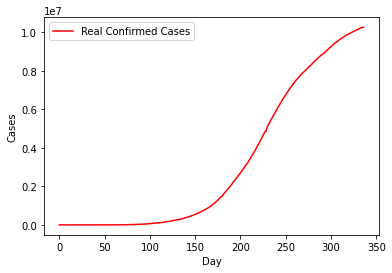

In [106]:
plt.plot(x, y_train, color='r',label="Real Confirmed Cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")
plt.show()

In [107]:
y_test = df.iloc[flag[0]:,-1]
y_test

337    10286709.0
338    10323965.0
339    10340469.0
340    10356844.0
341    10374932.0
          ...    
454    18376421.0
455    18762976.0
456    19164969.0
457    19557457.0
458    19557457.0
Name: Confirmed, Length: 122, dtype: float64

In [108]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {'kernel':['rbf','linear','poly']}
svr = SVR()
gs = GridSearchCV(svr,param_grid=params, cv=5)
gs.fit(x, y_train)
#gs.best_params_

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [109]:
gs.best_params_

{'kernel': 'linear'}

In [110]:
svr = SVR(kernel='linear')
svr.fit(x,y_train)
y_pred = svr.predict(x_test)

In [111]:
y_pred

array([5116574.475     , 5133460.76666667, 5150347.05833333,
       5167233.35      , 5184119.64166667, 5201005.93333333,
       5217892.225     , 5234778.51666667, 5251664.80833333,
       5268551.1       , 5285437.39166667, 5302323.68333333,
       5319209.975     , 5336096.26666667, 5352982.55833333,
       5369868.85      , 5386755.14166667, 5403641.43333333,
       5420527.725     , 5437414.01666667, 5454300.30833333,
       5471186.6       , 5488072.89166667, 5504959.18333333,
       5521845.475     , 5538731.76666667, 5555618.05833333,
       5572504.35      , 5589390.64166667, 5606276.93333333,
       5623163.225     , 5640049.51666667, 5656935.80833333,
       5673822.1       , 5690708.39166667, 5707594.68333333,
       5724480.975     , 5741367.26666667, 5758253.55833333,
       5775139.85      , 5792026.14166667, 5808912.43333333,
       5825798.725     , 5842685.01666667, 5859571.30833333,
       5876457.6       , 5893343.89166667, 5910230.18333333,
       5927116.475     ,

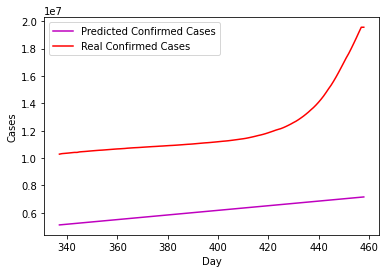

In [112]:
plt.plot(x_test, y_pred, color='m', label="Predicted Confirmed Cases")
plt.plot(x_test, y_test, color='r',label="Real Confirmed Cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")
plt.show()

In [118]:
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[3,5,10],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knnr = KNeighborsRegressor()
gs = GridSearchCV(knnr,param_grid=params, cv=5)
gs.fit(x, y_train)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 3}

In [119]:
knnr = KNeighborsRegressor(n_neighbors=3, algorithm='auto')
knnr.fit(x,y_train)
y_pred = knnr.predict(x_test)

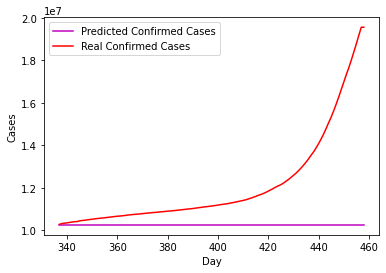

In [120]:
plt.plot(x_test, y_pred, color='m', label="Predicted Confirmed Cases")
plt.plot(x_test, y_test, color='r',label="Real Confirmed Cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")
plt.show()

In [123]:
model = PolynomialRegressionModel(polynomial_degree=1)
model.train(x,y_train)
y_pred = model.get_predictions(x_test)
y_pred

array([ 9196518,  9231900,  9267283,  9302666,  9338049,  9373431,
        9408814,  9444197,  9479579,  9514962,  9550345,  9585728,
        9621110,  9656493,  9691876,  9727258,  9762641,  9798024,
        9833407,  9868789,  9904172,  9939555,  9974937, 10010320,
       10045703, 10081086, 10116468, 10151851, 10187234, 10222616,
       10257999, 10293382, 10328765, 10364147, 10399530, 10434913,
       10470295, 10505678, 10541061, 10576444, 10611826, 10647209,
       10682592, 10717974, 10753357, 10788740, 10824123, 10859505,
       10894888, 10930271, 10965653, 11001036, 11036419, 11071802,
       11107184, 11142567, 11177950, 11213332, 11248715, 11284098,
       11319481, 11354863, 11390246, 11425629, 11461011, 11496394,
       11531777, 11567160, 11602542, 11637925, 11673308, 11708690,
       11744073, 11779456, 11814839, 11850221, 11885604, 11920987,
       11956369, 11991752, 12027135, 12062518, 12097900, 12133283,
       12168666, 12204048, 12239431, 12274814, 12310197, 12345

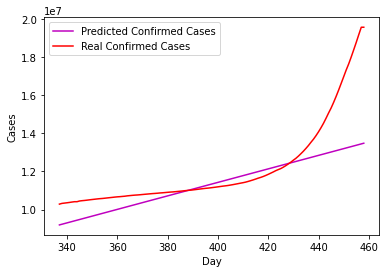

In [124]:
plt.plot(x_test, y_pred, color='m', label="Predicted Confirmed Cases")
plt.plot(x_test, y_test, color='r',label="Real Confirmed Cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")
plt.show()